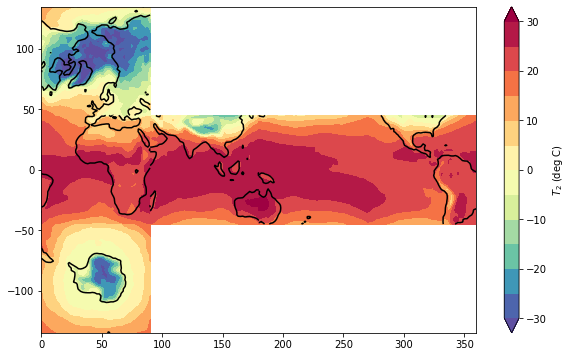

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

predictor_file = '/content/drive/My Drive/Colab Notebooks/Monthly mean air temperature data/tutorial_z500_t2m_CS.air.mon.mean.nc'
validation_file = '/content/drive/My Drive/Colab Notebooks/Monthly mean air temperature data/new.air.mon.mean.processed.nc'
lsm_file = '/content/drive/My Drive/Colab Notebooks/Monthly mean air temperature data/lsm.remapped.nc'

data = xr.open_dataset(predictor_file)
scale = xr.open_dataset(validation_file)
lsm = xr.open_dataset(lsm_file)

field = data.predictors.sel(sample='2000-01-01', varlev='air/0') * scale['std'].sel(varlev='air/0') \
    + scale['mean'].sel(varlev='air/0')

square_lon = np.zeros(data.lon.shape)
square_lat = np.zeros(data.lat.shape)
n_side = data.lon.shape[1]
for f in range(4):
    square_lon[f], square_lat[f] = np.meshgrid(np.linspace(90. * f, 90. * (f + 1), n_side),
                                               np.linspace(-45, 45, n_side))
square_lon[4], square_lat[4] = np.meshgrid(np.linspace(0., 90., n_side),
                                           np.linspace(-135., -45., n_side))
square_lon[5], square_lat[5] = np.meshgrid(np.linspace(0., 90., n_side),
                                           np.linspace(45., 135., n_side))

fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
for face in range(6):
    cf = ax.contourf(square_lon[face], square_lat[face], field.isel(face=face).values,
    np.arange(-30, 35, 5), cmap='Spectral_r', extend='both')
    ax.contour(square_lon[face], square_lat[face], lsm['predictors'].isel(face=face)[0, 0, ::, ::].values  , [0.5], colors='k')


plt.colorbar(cf, label='$T_2$ (deg C)', )
ax.set_aspect('equal', 'box' )
plt.savefig('cs-example-t2m.pdf', dpi=200, bbox_inches='tight')
plt.show()